# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['saskylakh', 'kapaa', 'roura', 'mataura', 'tasiilaq', 'nizamabad', 'ushuaia', 'vaini', 'qaanaaq', 'grand river south east', 'port lincoln', 'hermanus', 'samarai', 'florianopolis', 'huarmey', 'punta arenas', 'new norfolk', 'zvishavane', 'rikitea', 'yukhnov', 'mahebourg', 'rio gallegos', 'palabuhanratu', 'sao filipe', 'comodoro rivadavia', 'cairns', 'nabire', 'puerto leguizamo', 'araouane', 'nome', 'cape town', 'korla', 'hobart', 'arraial do cabo', 'te anau', 'attawapiskat', 'taolanaro', 'banda aceh', 'saint-philippe', 'lanigan', 'port elizabeth', 'nouadhibou', 'klaksvik', 'kaitangata', 'bathsheba', 'albany', 'bluff', 'yellowknife', 'lazaro cardenas', 'iqaluit', 'port alfred', 'kristiinankaupunki', 'sentyabrskiy', 'ilulissat', 'saldanha', 'benicarlo', 'pacific grove', 'isoka', 'bilma', 'east london', 'samusu', 'bambous virieux', 'huntsville', 'tumannyy', 'banjar', 'ballina', 'touros', 'norman wells', 'mayo', 'bavly', 'puerto ayora', 'palembang', 'quelimane', 'nantucket', 'barrow', 'ribe

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + str(weather_api_key) 


# Build partial query URL #query_url = f"{url}appid={api_key}&q={city}&units={units}"
query_url = f"{url}appid={weather_api_key}&q={city}&units=("f")"
#query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url + city).json()
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | roura
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | nizamabad
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | samarai
Processing Record 14 of Set 1 | florianopolis
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | zvishavane
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | yukhnov
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | rio galle

Processing Record 34 of Set 4 | sovetskiy
Processing Record 35 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 4 | tahta
Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | madison
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | wanning
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | abu dhabi
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | manggar
Processing Record 0 of Set 5 | avarua
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | seymchan
Processing Record 4 of Set 5 | roma
Processing Record 5 of Set 5 | vanavara
Processing Record 6 of Set 5 | satitoa
City not found. Skipping...
Processi

Processing Record 22 of Set 8 | marystown
Processing Record 23 of Set 8 | hervey bay
Processing Record 24 of Set 8 | iskateley
Processing Record 25 of Set 8 | mgandu
Processing Record 26 of Set 8 | kuche
City not found. Skipping...
Processing Record 27 of Set 8 | urupes
Processing Record 28 of Set 8 | varzelandia
Processing Record 29 of Set 8 | jalingo
Processing Record 30 of Set 8 | sanghar
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | kang
Processing Record 33 of Set 8 | agadez
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | ola
Processing Record 38 of Set 8 | bela
Processing Record 39 of Set 8 | villa maria
Processing Record 40 of Set 8 | staroshcherbinovskaya
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | japura
Processing Record 43 of Set 8 | rumoi
Processing Record 44 of Set 8 | vestmannaeyjar
Processing Record 45 of Set 8 | miku

Processing Record 10 of Set 12 | monte alto
Processing Record 11 of Set 12 | ulaanbaatar
Processing Record 12 of Set 12 | muros
Processing Record 13 of Set 12 | maunabo
Processing Record 14 of Set 12 | aksu
Processing Record 15 of Set 12 | katangli
Processing Record 16 of Set 12 | joshimath
Processing Record 17 of Set 12 | ouesso
Processing Record 18 of Set 12 | churapcha
Processing Record 19 of Set 12 | nichinan
Processing Record 20 of Set 12 | barvinkove
Processing Record 21 of Set 12 | borgarnes
Processing Record 22 of Set 12 | ilebo
Processing Record 23 of Set 12 | catuday
Processing Record 24 of Set 12 | wattegama
Processing Record 25 of Set 12 | saint-georges
Processing Record 26 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 27 of Set 12 | gamba
Processing Record 28 of Set 12 | shache
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | kimbe
Processing Record 31 of Set 12 | scarborough
Processing Record 32 of Set 12 | alotau
City not fo

In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-37.91,100,91,5.77,RU,1675891573
1,kapaa,22.0752,-159.3190,80.58,63,20,25.32,US,1675891575
2,roura,4.7263,-52.3274,78.71,83,75,10.36,GF,1675891578
3,mataura,-46.1927,168.8643,50.49,91,96,7.99,NZ,1675891578
4,tasiilaq,65.6145,-37.6368,5.16,54,0,9.78,GL,1675891580


In [102]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data/"cities.csv_file")#, index_label="City_ID")

NameError: name 'output_data' is not defined

In [103]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

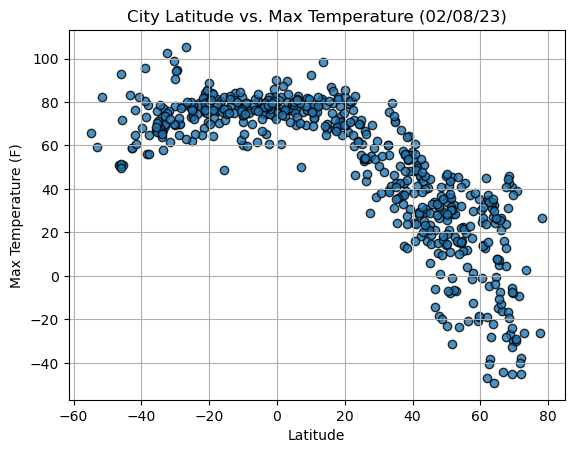

In [104]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The above City Latitude vs. Max Temperature scatter plots shows that a city's maximum temperature is
higher closer to the equator and lowers as the latitude of the city increases.  The highest maximum
temperatures occur between -40° and 20° latitude.


#### Latitude Vs. Humidity

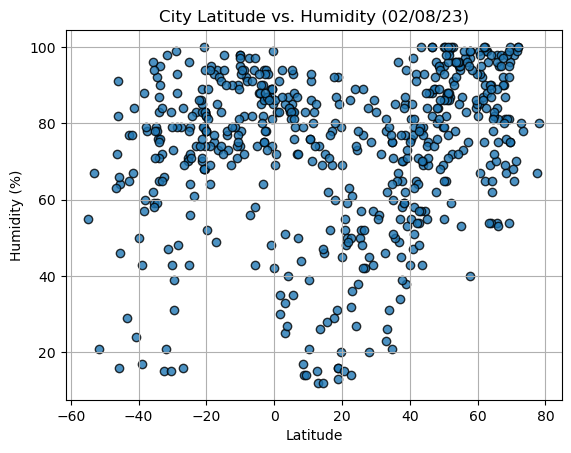

In [105]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The above City Latitude vs Humidity scatter plot shows that a city's latitude location cannot be used
to predict the level of humidity.  The data on the scatter plot is randomly distributed across the 
latitude locations.

#### Latitude Vs. Cloudiness

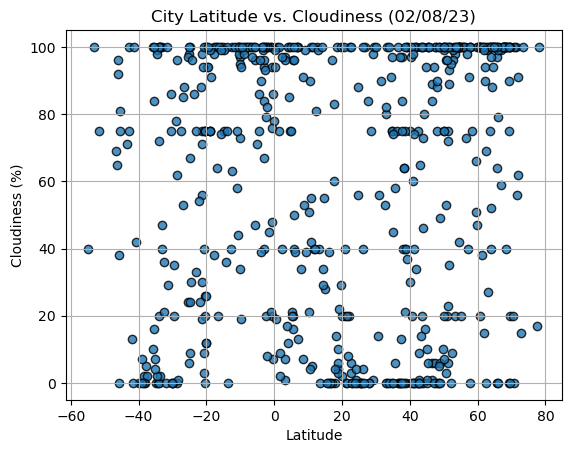

In [106]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The above City Latitude vs. Cloudiness scatter plot does not show a correlation between change in
city latitude and the level of cloudiness.  There is a noticable cluster of cities with 100% cloudiness across the measured latitudes.  The cluster of cities with 0% cloudiness are grouped above 20° latitude and below -20° latitude.

#### Latitude vs. Wind Speed Plot

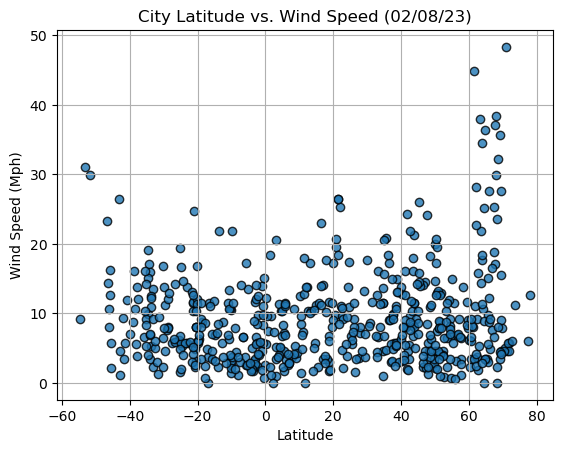

In [107]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

The above City Latitude vs. Wind Speed scatter plot shows that the data is evenly distributed until 
the city locations reach 60° latitude and above.  There is an increase in the wind speed for a 
signifigant number of cities at and above 60° latitude with but the majority maintain the same 
wind speed rate of below 10mph as the other cities below 60° latitude. 

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(lat, northern_hemi)
    regress_values = x_values * slope + intercept
# lat_fit = lat_slope * year + lat_int
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [109]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [110]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [111]:
# build scatter plot
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

<Figure size 900x600 with 0 Axes>

In [112]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regression values
regress_values = x_values * slope + intercept
# line equation
#line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


#  Northern Hemisphere Max Temp vs. Latitude Linear Regression Plot

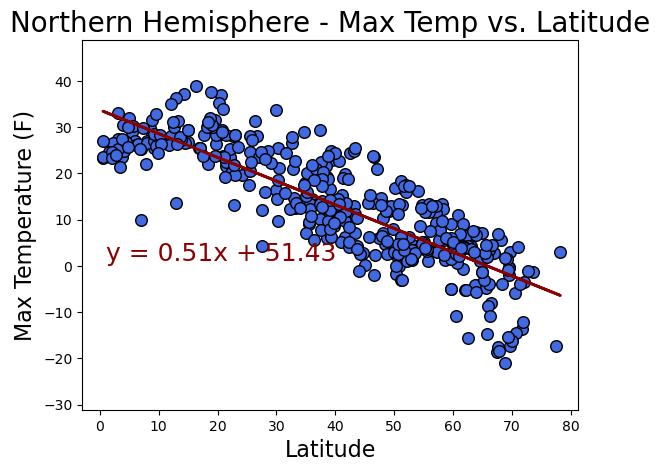

In [113]:
# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(northern_hemi_df['Max Temp'])-10, max(northern_hemi_df['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(northern_hemi_df['Lat'])+3)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

The Northern Hemisphere-Max Temp vs. Latitude chart linear regression model shows a strong negative correlation.  The farther from the equator a city is located the lower the maximum temperature will be.

# Southern Hemisphere Max Temp vs. Latitude Linear Regression Plot

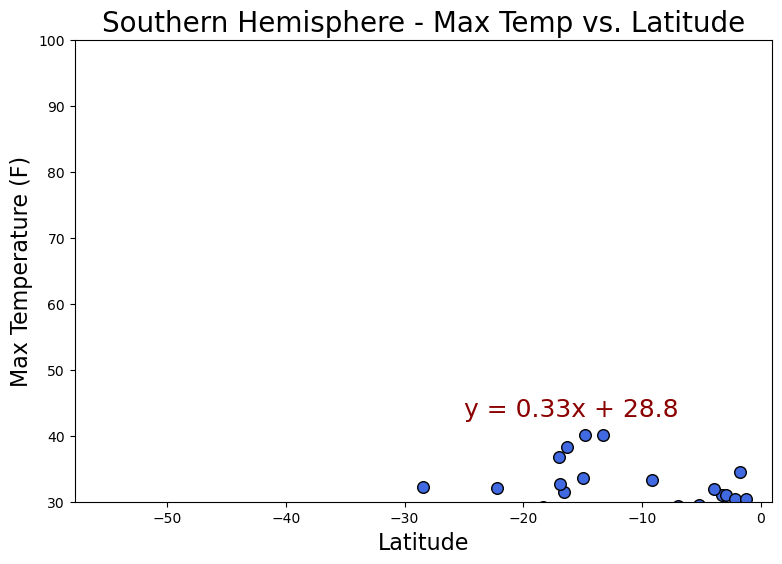

In [114]:
# Linear regression on Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(southern_hemi_df['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()


The Southern Hemisphere-Max Temp vs. Latitude chart
linear regression model shows a weaker positive correlation.  The closer to the equator the higher
the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

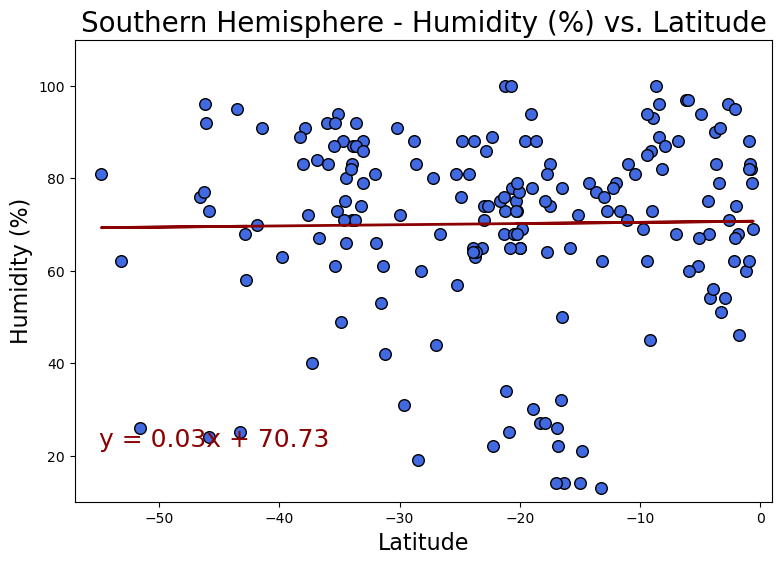

In [115]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()

The above Southern Hemisphere Humidity vs. Latitude Linear Regression Plot is showing a medium postive regression model.  The humidity rises slightly the closer to the city is to the equator

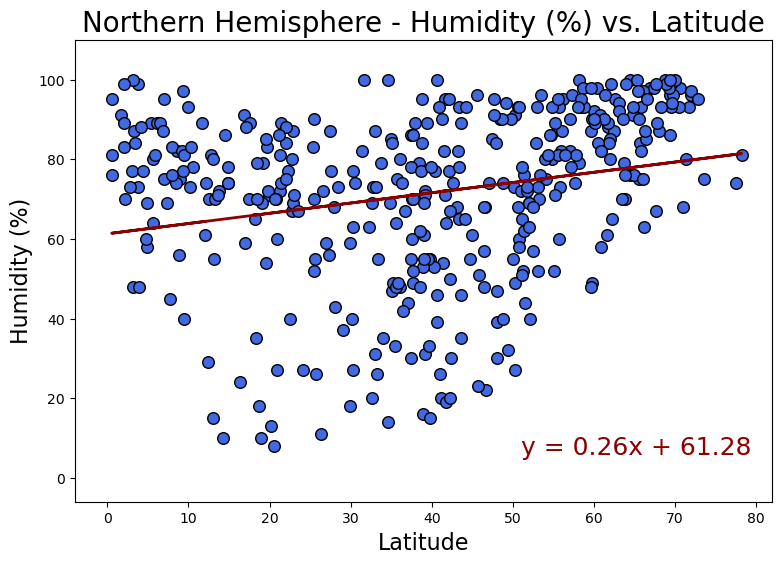

In [116]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

The above Northern Hemisphere Humidity vs. Lattitude Regression Plot shows a regression model that is postive and slightly stronger than the Southern Hemisphere model.  The is number of cities with higher humidity increases the farther away from the city is from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

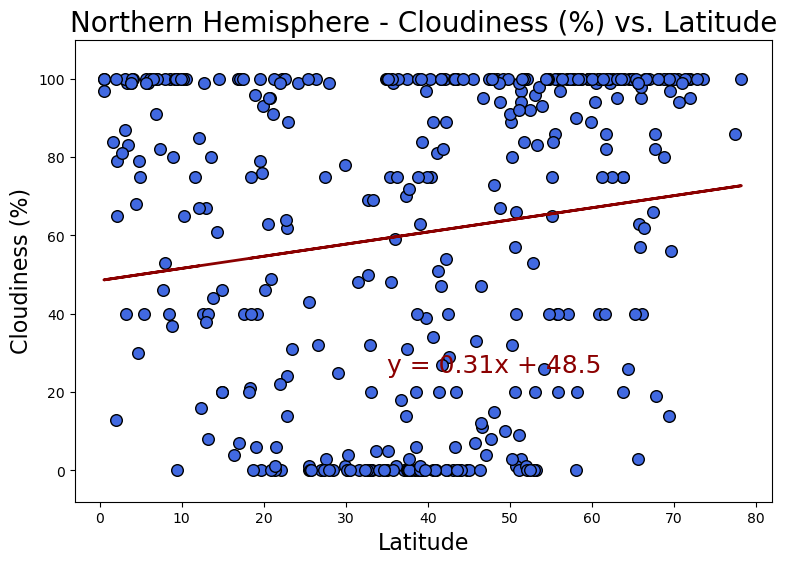

In [117]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

The Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot shows a slightly positive regression model that is not immediately apparent on the scatter plot.  The city cloudiness will increase slightly as the city location gets farther from the equator.

# Southern Hemisphere Cloudiness (%) vs Latitude Linear Regression Plot

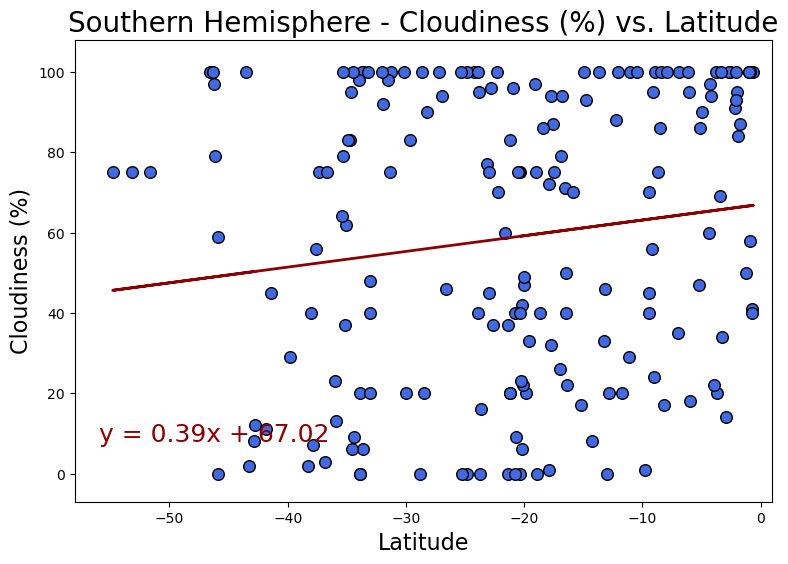

In [118]:
# Southern Hemisphere

# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

The above Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression Plot shows that there is a stronger postive regression model.  The closer to the equator the higher the percent of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

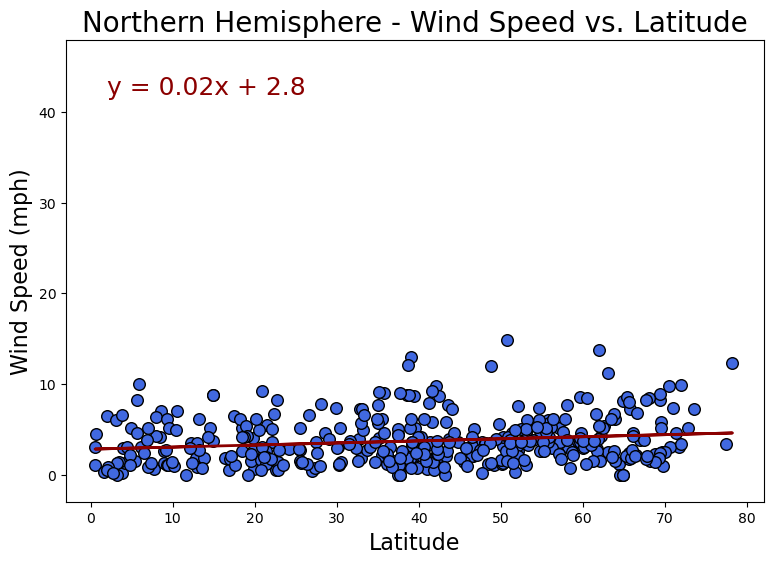

In [119]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

The above Northern Hemisphere Wind Speed vs Latitude Linear Regression Plot shows a regression model that is nearly flat.  This is showing that there is very little effect on wind speed per city as the model moves higher in latitude.

# Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot

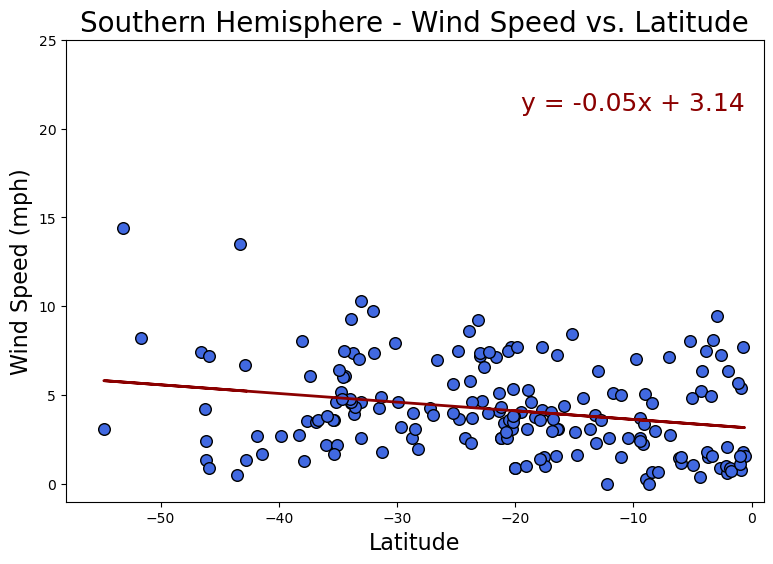

In [120]:
# Southern Hemisphere

# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

The above Southern Hemisphere Wind Speed vs Latitude Linear Regression Plot shows a slightly negative regression model.  The wind speed decreases slightly per city the model moves closer to the equator.